# T3 - MC920
> Natan Beltrão da Cunha Pevidor Carvalho - 184972

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import pandas as pd

def dilate(img, kdim):
    maximum = img.max()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kdim)
    dilated_img = cv2.dilate(maximum - img, kernel)
    return maximum - dilated_img

def erode(img, kdim):
    maximum = img.max()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kdim)
    eroded_img = cv2.erode(maximum - img, kernel)
    return maximum - eroded_img

def close(img, kdim):
    maximum = img.max()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kdim)
    closed_img = cv2.morphologyEx(maximum - img, cv2.MORPH_CLOSE, kernel)
    return maximum - closed_img

img = cv2.imread('./images/in/bitmap.pbm', 0)

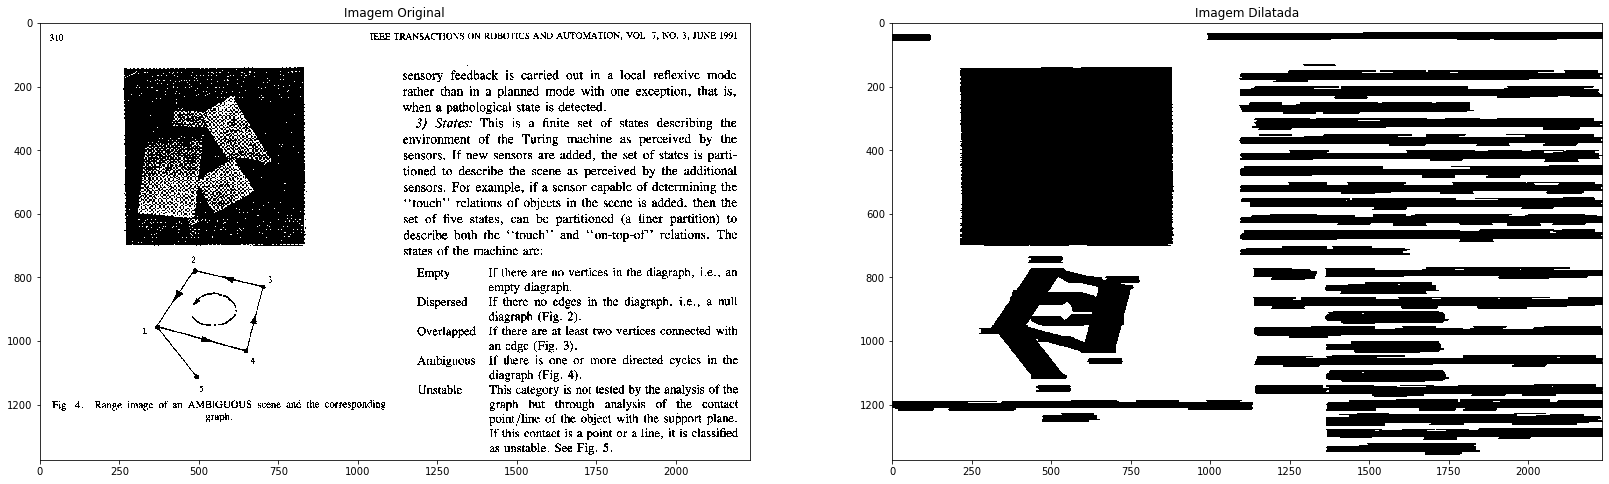

In [2]:
first = dilate(img, (100, 1))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Imagem Dilatada')
axis[1].imshow(first, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/first.pbm', first.astype(np.uint8))

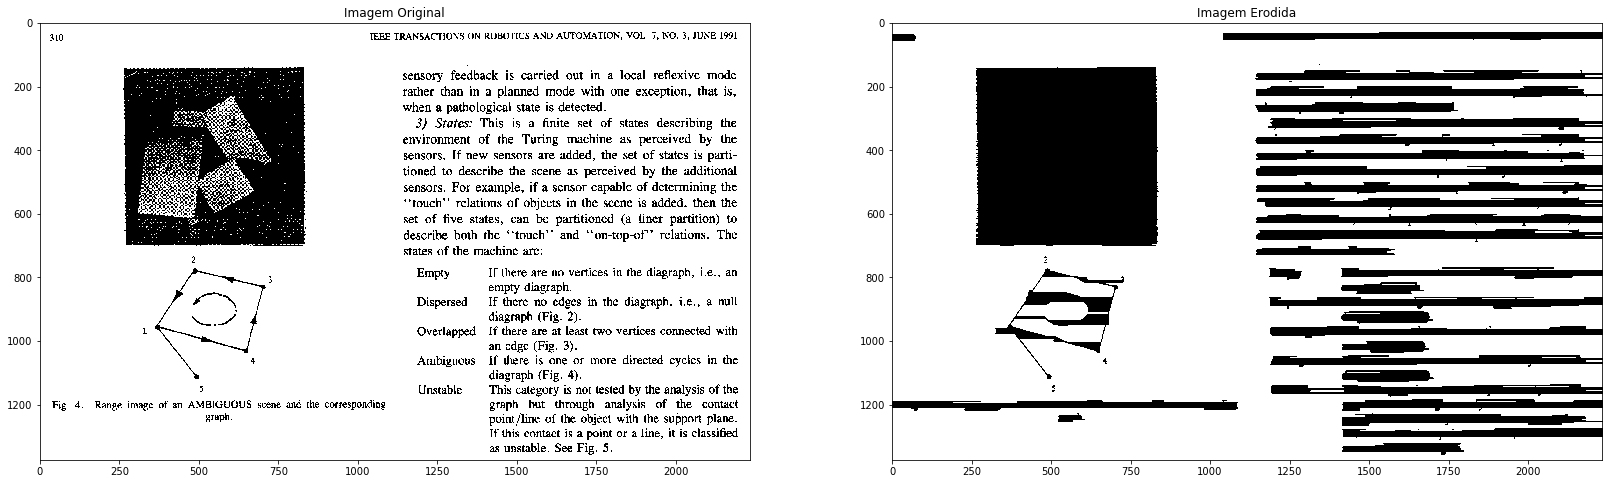

In [3]:
second = erode(first, (100, 1))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Imagem Erodida')
axis[1].imshow(second, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/second.pbm', second.astype(np.uint8))

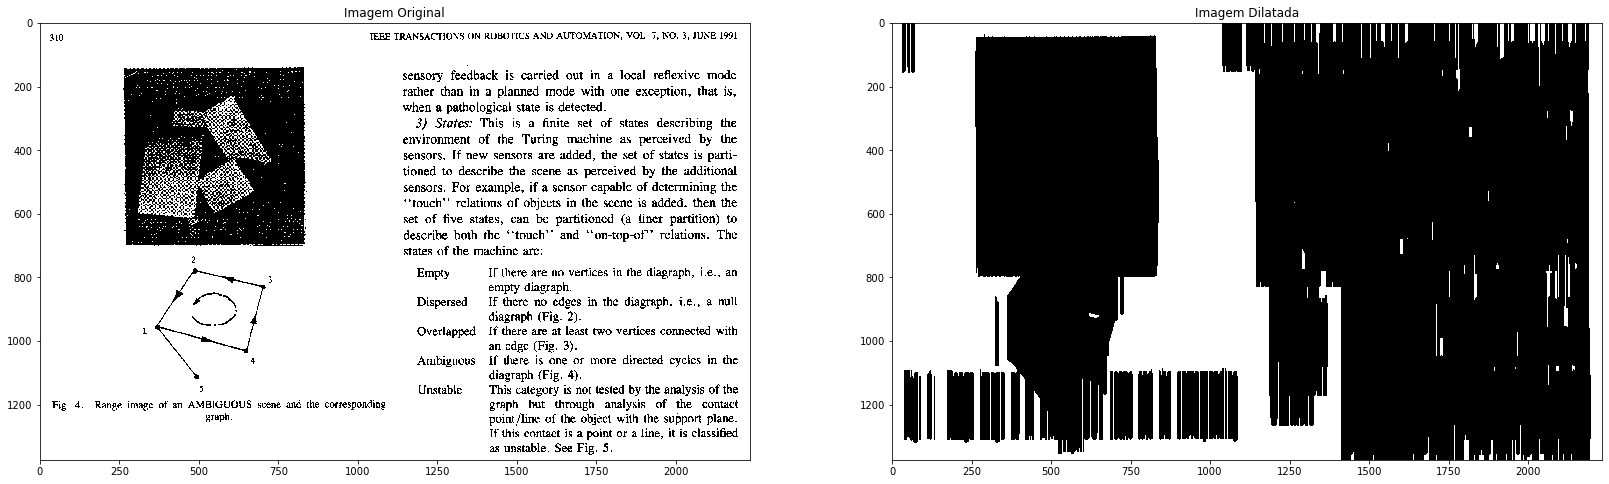

In [4]:
third = dilate(img, (1, 200))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Imagem Dilatada')
axis[1].imshow(third, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/third.pbm', third.astype(np.uint8))

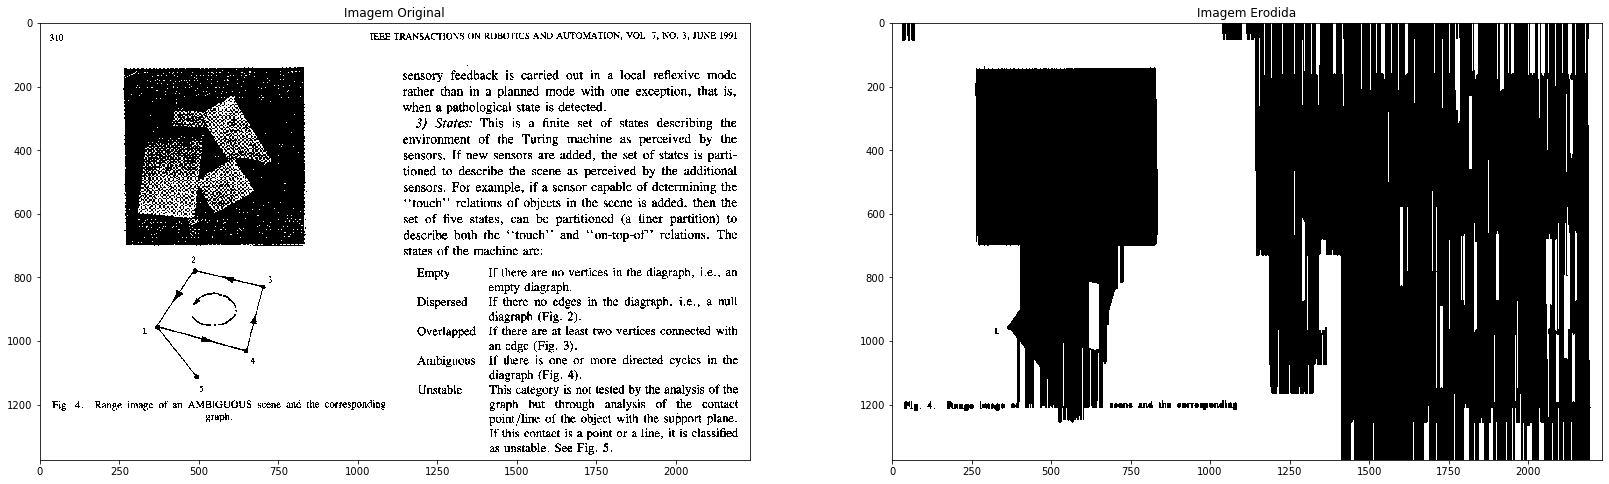

In [5]:
fourth = erode(third, (1, 200))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Imagem Erodida')
axis[1].imshow(fourth, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/fourth.pbm', fourth.astype(np.uint8))

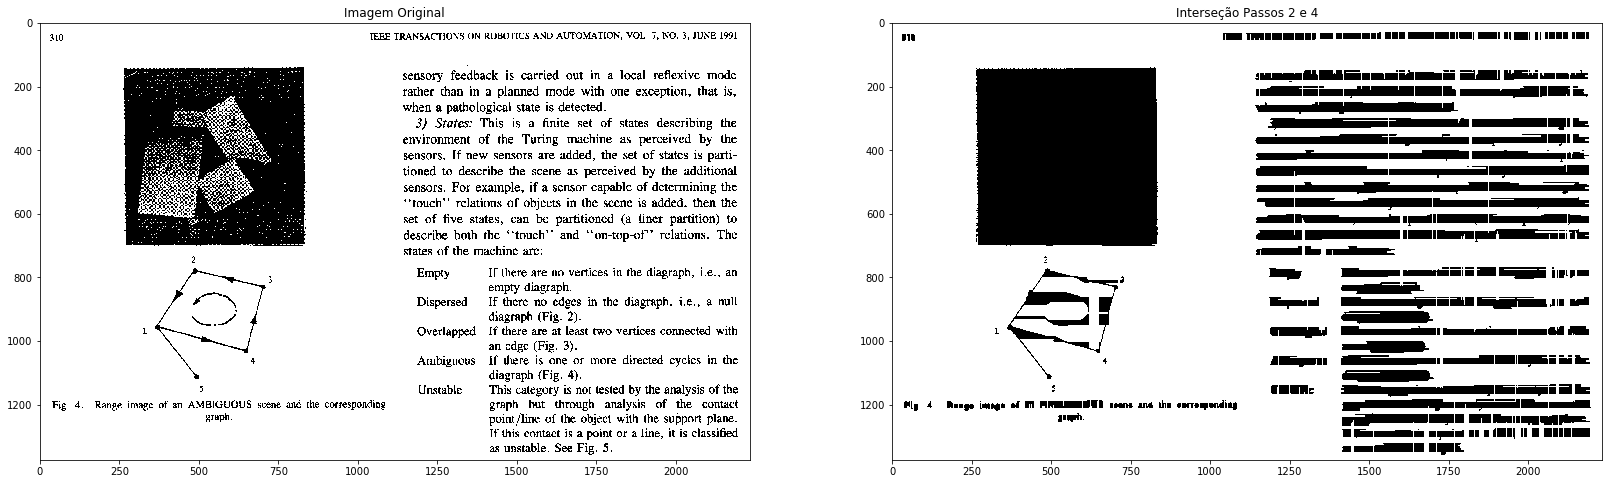

In [6]:
fifth = np.maximum(second, fourth)

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Interseção Passos 2 e 4')
axis[1].imshow(fifth, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/fifth.pbm', fifth.astype(np.uint8))

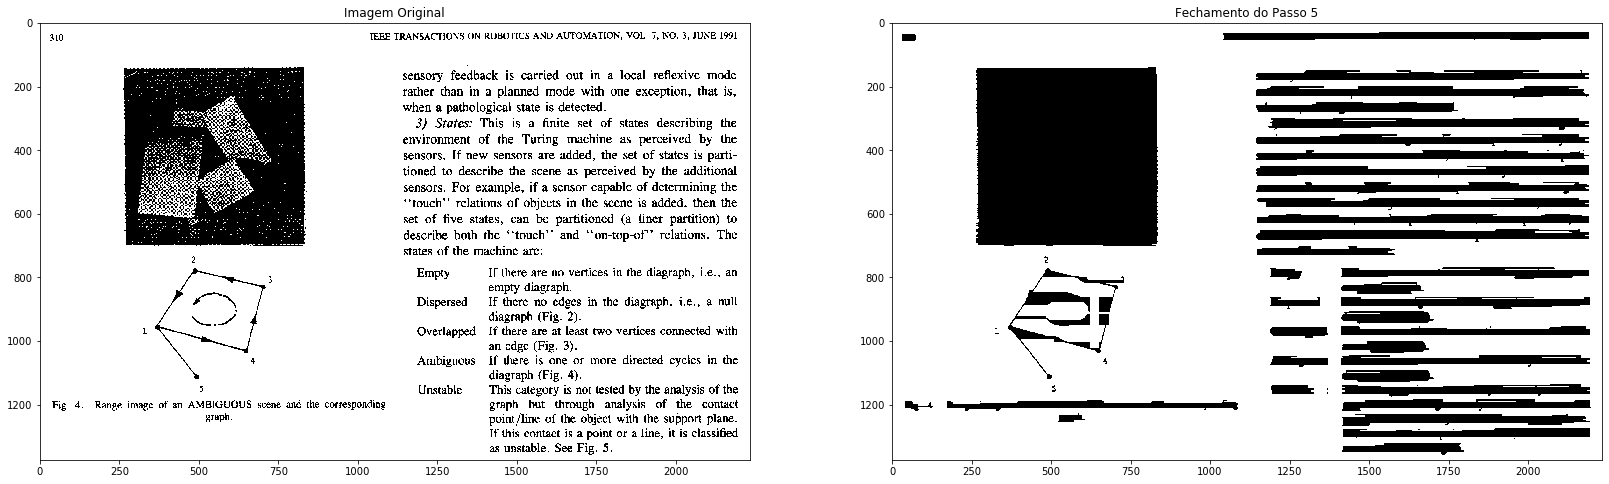

In [7]:
sixth = close(fifth, (30, 1))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Fechamento do Passo 5')
axis[1].imshow(sixth, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/sixth.pbm', sixth.astype(np.uint8))

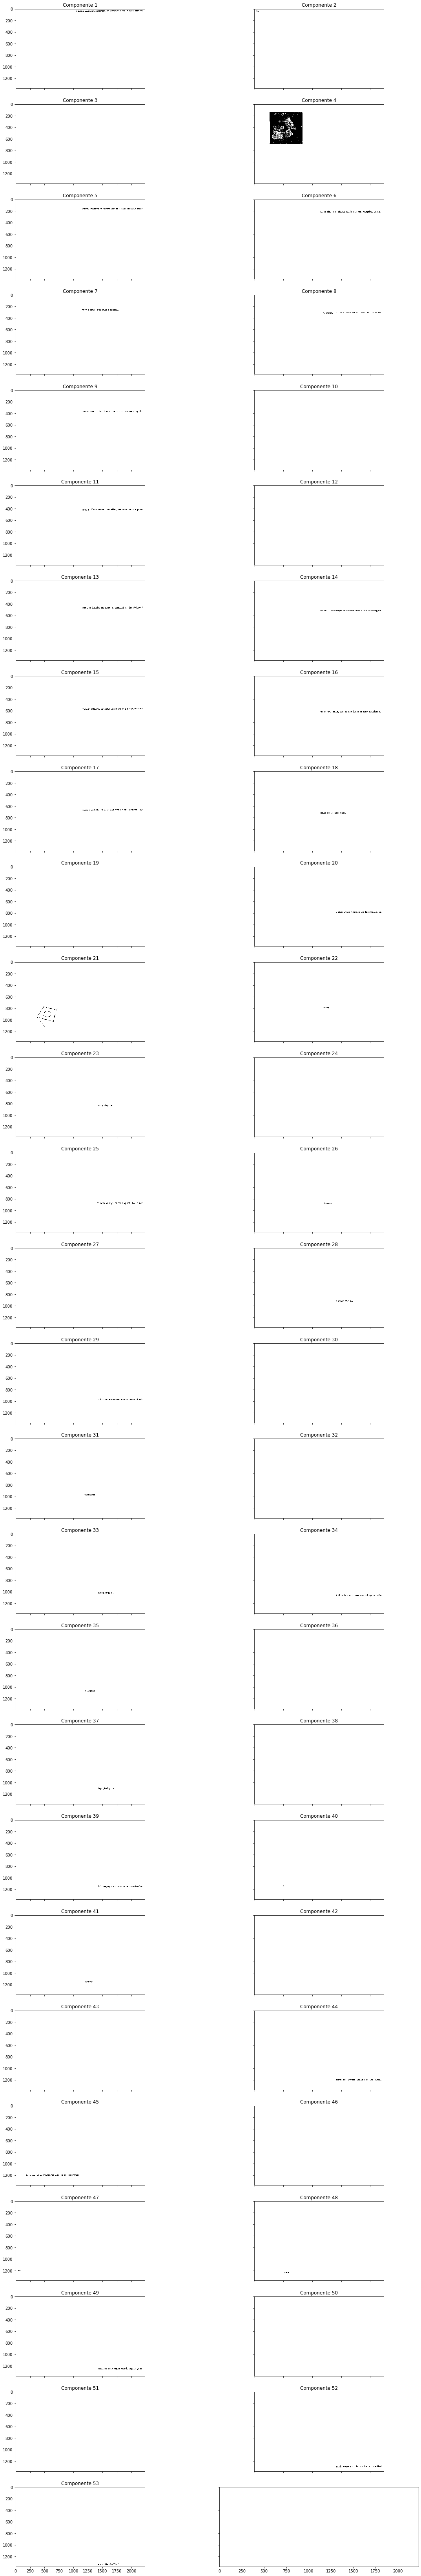

In [8]:
totalLabels, label_ids, stats, centroid = cv2.connectedComponentsWithStats(255 - sixth, 8, cv2.CV_32S)

figure, axis = plt.subplots(math.ceil((totalLabels - 1) / 2), 2, sharex=True, sharey=True, figsize=(20, 120))

for i in range(1, totalLabels):    
    componentMask = 255 - (label_ids == i).astype("uint8") * 255
    output = np.maximum(img, componentMask)
    vpos = (i - 1) // 2
    hpos = (i - 1) % 2
    axis[vpos,hpos].set_title(f'Componente {i}')
    axis[vpos,hpos].imshow(output, cmap='gray', vmin=0, vmax=255)
    imageio.imsave(f'./images/out/component{i}.pbm', output.astype(np.uint8))

plt.show()

In [9]:
table = []
for i in range(1, totalLabels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    uniques, counts = np.unique(img[y:y+h+1, x:x+w+1], return_counts=True)
    total = 0 if uniques[0] != 0 else counts[0]
    percentage = total * 100 / (w * h)
    
    vtransitions = 0
    htransitions = 0
    for j in range(h):
        for k in range(w):
            if (j < h - 1 and img[y+j, x+k] != img[y+j+1, x+k]):
                vtransitions += 1
            if (k < w - 1 and img[y+j, x+k] != img[y+j, x+k+1]):
                htransitions += 1
    vtransratio = 100 if total == 0 else vtransitions * 100 / total
    htransratio = 100 if total == 0 else htransitions * 100 / total
    
    table.append([i, x, y, w, h, area, percentage, vtransratio, htransratio])

,Componente,X,Y,Largura,Altura,Área,Porcentagem de Preto,Transições Verticais / Preto,Transições Horizontais / Preto,Texto
0,1,1039,28,1150,25,24201,29.76%,32.09%,41.78%,Verdadeiro
1,2,32,36,42,21,866,36.85%,25.54%,49.54%,Falso
2,3,1343,131,2,3,4,0.00%,100.00%,100.00%,Falso
3,4,264,139,572,561,315070,83.71%,16.75%,16.82%,Falso
4,5,1142,147,1046,40,26026,21.47%,29.82%,34.27%,Verdadeiro
5,6,1142,198,1046,40,27655,22.25%,27.31%,34.49%,Verdadeiro
6,7,1142,248,636,39,16418,25.52%,28.12%,34.59%,Verdadeiro
7,8,1182,298,1007,39,27082,20.51%,30.53%,35.84%,Verdadeiro
8,9,1142,348,1047,40,24980,20.87%,29.40%,35.38%,Verdadeiro
9,10,1205,350,4,5,18,45.00%,11.11%,55.56%,Falso


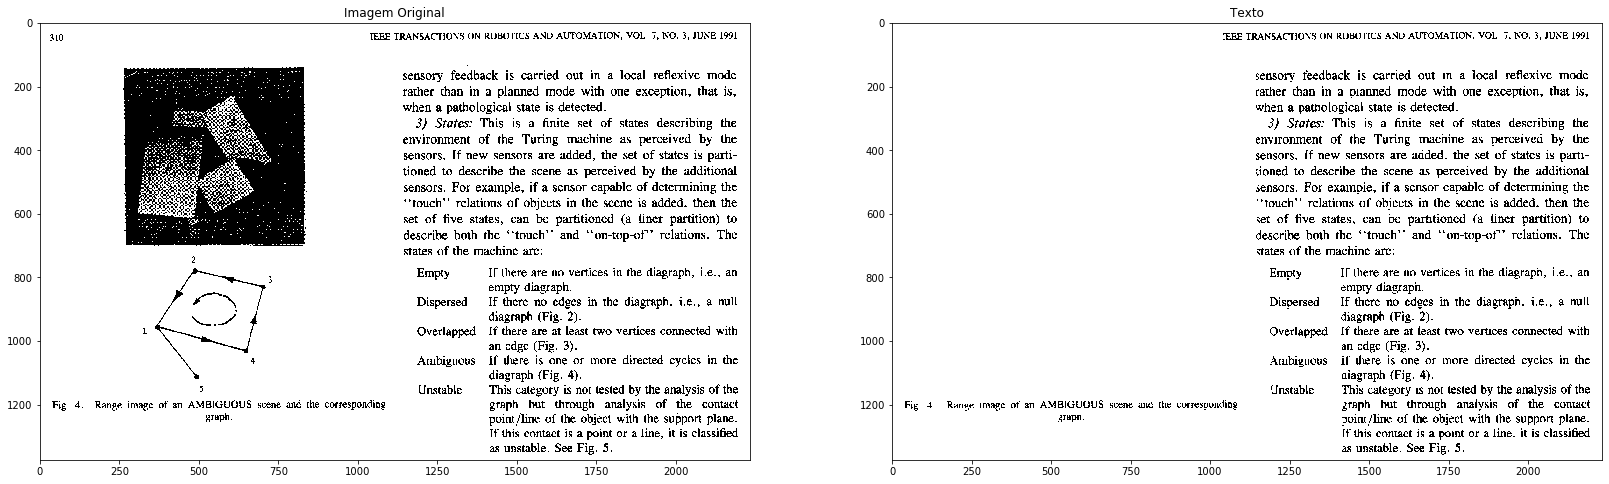

In [10]:
def isText(area, percentage, vtrans, htrans):
    return area > 150 and percentage > 20 and percentage < 60 and vtrans > 20 and vtrans < 40 and htrans > 20 and htrans < 45

ninth = np.full(img.shape, 255, dtype="uint8")
for i in range(len(table)):
    text = isText(table[i][5], table[i][6], table[i][7], table[i][8])
    
    if text:
        componentMask = 255 - (label_ids == i+1).astype("uint8") * 255
        filteredComponent = np.maximum(img, componentMask)
        ninth = np.minimum(ninth, filteredComponent)
    
    table[i].append('Verdadeiro' if text else 'Falso')
pd.options.display.float_format = '{0:.2f}%'.format
display(pd.DataFrame(table, columns=['Componente', 'X', 'Y', 'Largura', 'Altura', 'Área', 'Porcentagem de Preto', 'Transições Verticais / Preto', 'Transições Horizontais / Preto', 'Texto']))

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Texto')
axis[1].imshow(ninth, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/ninth.pbm', ninth.astype(np.uint8))

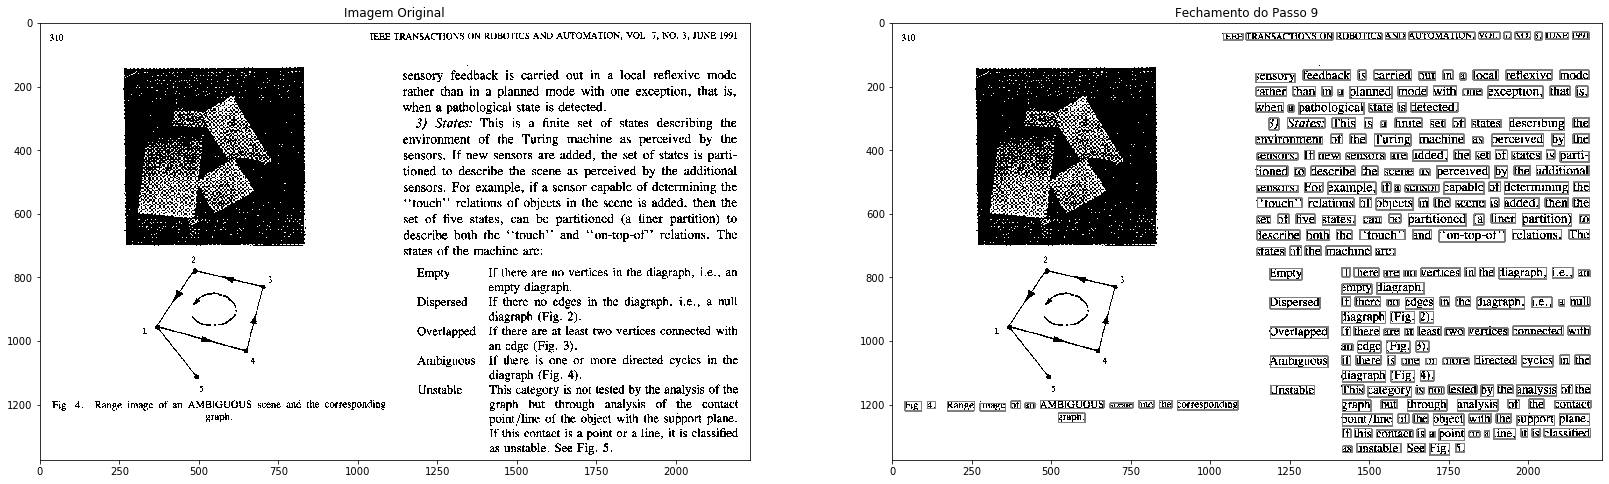

In [12]:
closed = close(ninth, (12, 7))

totalLabels, label_ids, stats, centroid = cv2.connectedComponentsWithStats(255 - closed, 8, cv2.CV_32S)
tenth = img.copy()
for i in range(1, totalLabels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    cv2.rectangle(tenth, (x, y), (x + w, y + h), 127, 3)

figure, axis = plt.subplots(1, 2, figsize=(28,16))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axis[1].set_title('Fechamento do Passo 9')
axis[1].imshow(tenth, cmap='gray', vmin=0, vmax=255)
plt.show()

imageio.imsave('./images/out/tenth.pbm', tenth.astype(np.uint8))